In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv('https://stepik.org/media/attachments/course/4852/invasion.csv')

In [3]:
df.head()

,class,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,transport,2.190672,6.716633,62.168208,0.347465,158221,44.932446
1,transport,3.453276,8.995909,62.994707,0.590094,385972,41.568300
2,transport,2.432994,6.938691,62.245807,0.329288,446482,40.123467
3,fighter,6.083763,3.019459,18.474555,0.174738,210125,11.384865
4,fighter,12.876769,2.452950,195.805771,0.150446,23109,11.328806


In [4]:
X_train = df.drop('class', axis=1)

In [5]:
y_train = df['class']

In [6]:
est = RandomForestClassifier(random_state=0)

In [7]:
clf = GridSearchCV(est, {
    'n_estimators': range(10, 51, 10),
    'max_depth': range(1, 13, 2),
    'min_samples_leaf': range(1, 8),
    'min_samples_split': range(2, 10, 2)
}, n_jobs=-1)

In [8]:
clf.fit(X_train, y_train)

/home/alina/intro-to-data-science-stepik/venv/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': range(10, 51, 10), 'max_depth': range(1, 13, 2), 'min_samples_leaf': range(1, 8), 'min_samples_split': range(2, 10, 2)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [9]:
rf = clf.best_estimator_

In [11]:
X_test = pd.read_csv('https://stepik.org/media/attachments/course/4852/operative_information.csv')

In [12]:
y_test = rf.predict(X_test)

In [13]:
y_test

array(['fighter', 'transport', 'transport', ..., 'transport', 'fighter',
       'transport'], dtype=object)

In [15]:
y_test[y_test == 'fighter'].size

675

In [16]:
y_test[y_test == 'transport'].size

595

In [18]:
y_test[y_test == 'cruiser'].size

230

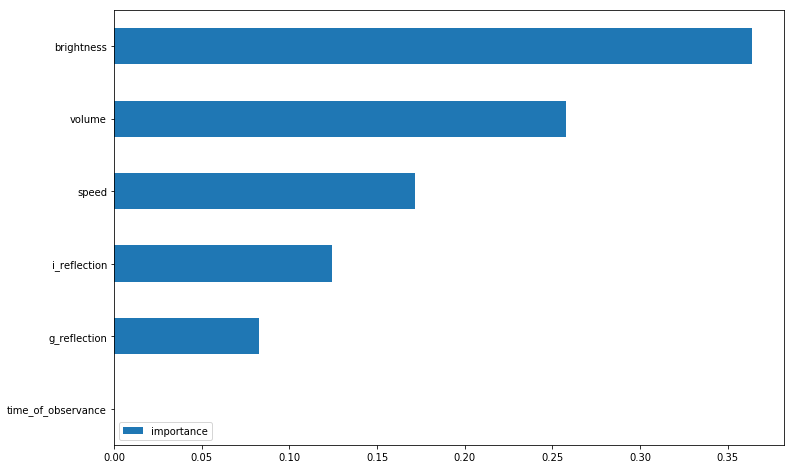

In [20]:
imp = pd.DataFrame(rf.feature_importances_, index=X_train.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

In [21]:
rf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [22]:
danger = pd.read_csv('https://stepik.org/media/attachments/course/4852/space_can_be_a_dangerous_place.csv')

In [23]:
danger.head()

,r,phi,peradventure_index,dustiness,black_hole_is_near,buggers_were_noticed,nearby_system_has_planemo,dangerous
0,169.1,138.0,22.3212,0.706285,0,1,1,1
1,11.1,148.0,1.4652,-0.410512,1,1,1,1
2,274.6,201.0,36.2472,0.756457,1,1,1,1
3,172.8,173.0,22.8096,0.035221,1,1,1,1
4,223.3,222.0,29.4756,0.197271,0,1,1,1


In [24]:
X_train = danger.drop('dangerous', axis=1)

In [25]:
y_train = danger.dangerous

In [26]:
est = RandomForestClassifier(random_state=0)

In [27]:
clf = GridSearchCV(est, {
    'n_estimators': range(10, 51, 10),
    'max_depth': range(1, 13, 2),
    'min_samples_leaf': range(1, 8),
    'min_samples_split': range(2, 10, 2)
}, n_jobs=-1, cv=5)

In [28]:
clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': range(10, 51, 10), 'max_depth': range(1, 13, 2), 'min_samples_leaf': range(1, 8), 'min_samples_split': range(2, 10, 2)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [29]:
rf = clf.best_estimator_

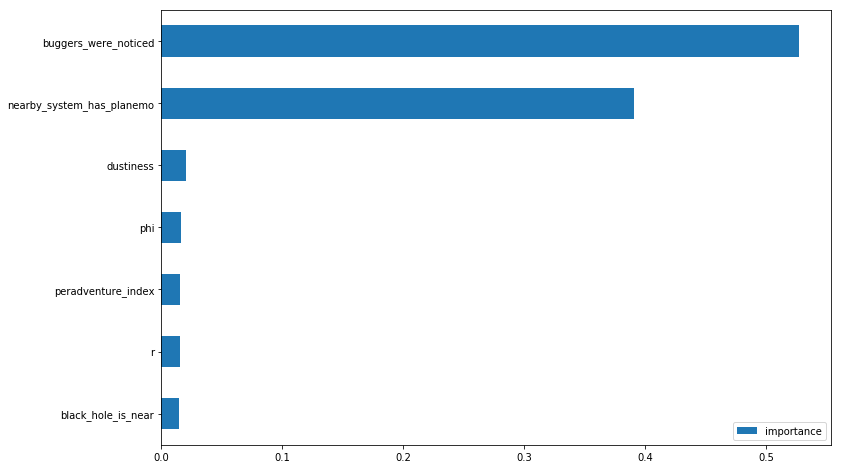

In [30]:
imp = pd.DataFrame(rf.feature_importances_, index=X_train.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))